### 1. Visualizing the Kuramoto dynamics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000
K_values = np.linspace(1, 5, 20)  # Range of K values around K_c
K_c = 2 * np.sqrt(2 / np.pi)
dt = 0.01
T = 1000
time_steps = int(T / dt)

# Initialize frequencies
omega = np.random.normal(0, 1, N)

# Function to compute the order parameter
def order_parameter(theta):
    return np.abs(np.sum(np.exp(1j * theta)) / N)

# Function to run the dynamics
def run_kuramoto(K, theta):
    for t in range(time_steps):
        theta_diff = np.subtract.outer(theta, theta)
        coupling_term = (K / N) * np.sum(np.sin(theta_diff), axis=1)
        theta += dt * (omega + coupling_term)
        theta = np.mod(theta, 2 * np.pi)
    return theta

# Compute r for different K values
r_values = []
for K in K_values:
    theta = np.random.uniform(0, 2 * np.pi, N)
    theta = run_kuramoto(K, theta)
    r = order_parameter(theta)
    r_values.append(r)

# Plot r vs K
plt.figure()
plt.plot(K_values, r_values, 'o-', label='Order Parameter r')
plt.axvline(K_c, color='r', linestyle='--', label='Critical Coupling K_c')
plt.xlabel('Coupling Strength K')
plt.ylabel('Order Parameter r')
plt.title('Order Parameter vs Coupling Strength')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot phases on a unit circle for selected K values
selected_K = [1, K_c, 4]  # K < K_c, K = K_c, K > K_c
for K in selected_K:
    theta = np.random.uniform(0, 2 * np.pi, N)
    theta = run_kuramoto(K, theta)
    plt.figure()
    plt.scatter(np.cos(theta), np.sin(theta), alpha=0.5)
    plt.title(f'Phases on Unit Circle for K = {K}')
    plt.xlabel('cos(theta)')
    plt.ylabel('sin(theta)')
    plt.axis('equal')
    plt.grid()
    plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

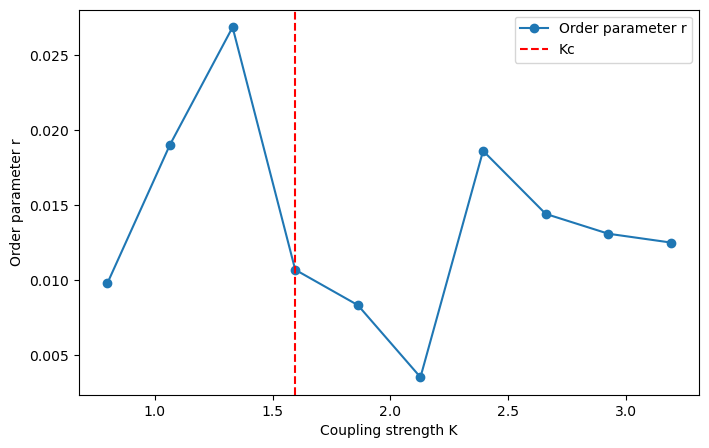

In [2]:
# Parameters
N = 1000  # Number of oscillators
Kc = 2 * np.sqrt(2 / np.pi)  # Critical coupling
K_values = np.linspace(0.5 * Kc, 2 * Kc, 10)  # Range of K values

# Sample natural frequencies from a Gaussian distribution
omega = np.random.normal(0, 1, N)

# Function to compute dtheta/dt
def kuramoto(theta, t, K):
    return omega + (K / N) * np.sum(np.sin(theta[:, None] - theta), axis=1)

# Time evolution
T = np.linspace(0, 100, 1000)  # Integration time
r_values = []

def compute_order_parameter(theta):
    return np.abs(np.mean(np.exp(1j * theta)))

for K in K_values:
    theta0 = np.random.uniform(0, 2 * np.pi, N)  # Random initial phases
    theta_t = odeint(kuramoto, theta0, T, args=(K,))
    theta_final = theta_t[-1]  # Take final state
    r_values.append(compute_order_parameter(theta_final))

# Plot order parameter vs K
plt.figure(figsize=(8, 5))
plt.plot(K_values, r_values, 'o-', label='Order parameter r')
plt.axvline(Kc, color='r', linestyle='--', label='Kc')
plt.xlabel('Coupling strength K')
plt.ylabel('Order parameter r')
plt.legend()
plt.show()

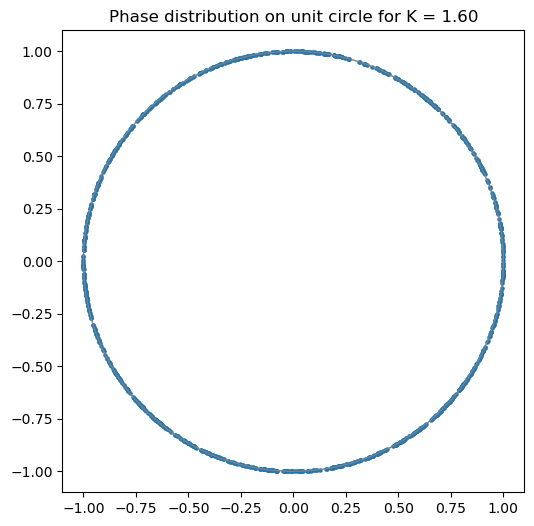

In [3]:
# Visualization of phases on unit circle for a given K
K_selected = Kc
theta0 = np.random.uniform(0, 2 * np.pi, N)
theta_t = odeint(kuramoto, theta0, T, args=(K_selected,))
theta_final = theta_t[-1]

plt.figure(figsize=(6, 6))
plt.scatter(np.cos(theta_final), np.sin(theta_final), s=5)
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
plt.gca().add_patch(circle)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal')
plt.title(f'Phase distribution on unit circle for K = {K_selected:.2f}')
plt.show()